# Maximum drawdown

In [56]:
import pandas as pd
import numpy as np
raw = pd.read_csv('data/pyalgo_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()
data = pd.DataFrame(raw['EUR='])
data.rename(columns={'EUR=': 'price'}, inplace=True)
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()
data.tail()
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.dropna(inplace=True)
data['returns'] = np.log(data['price'] / data['price'].shift(1))
data['strategy'] = data['position'].shift(1) * data['returns']

### Cumulative return

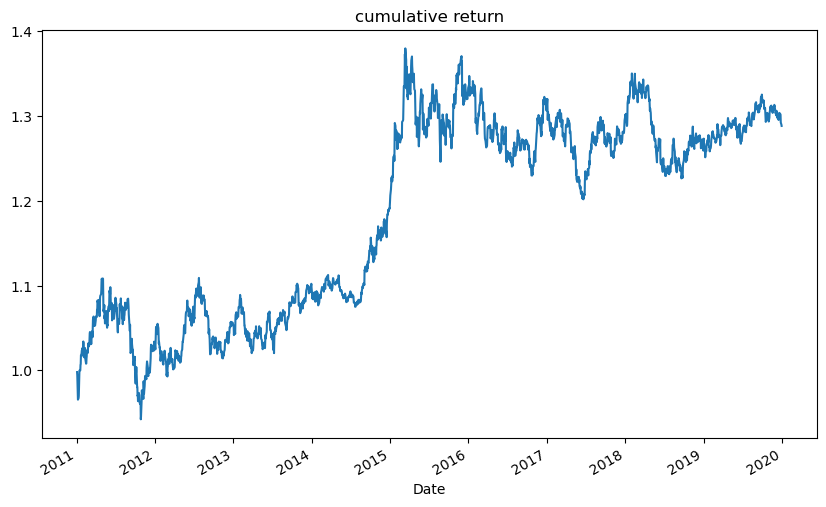

In [46]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cumret'].plot(title='cumulative return', figsize=(10, 6));

### Cumulative maximum return

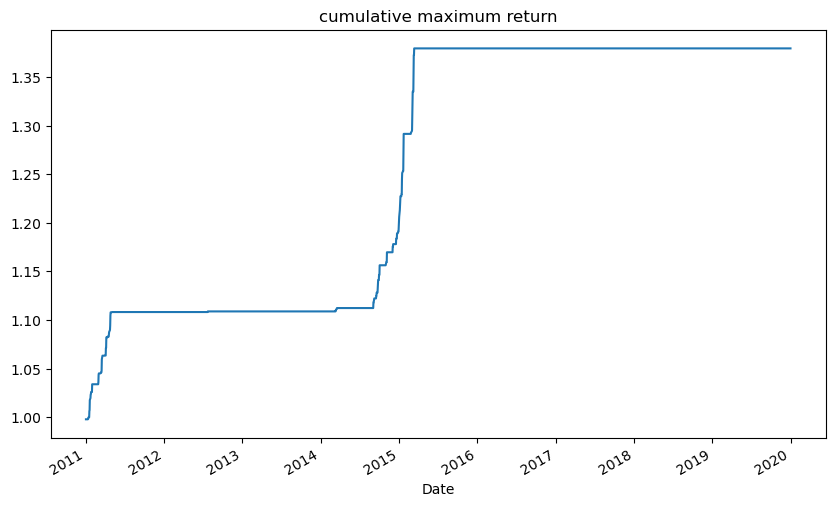

In [47]:
data['cummax'] = data['cumret'].cummax()
data['cummax'].plot(title='cumulative maximum return', figsize=(10, 6));

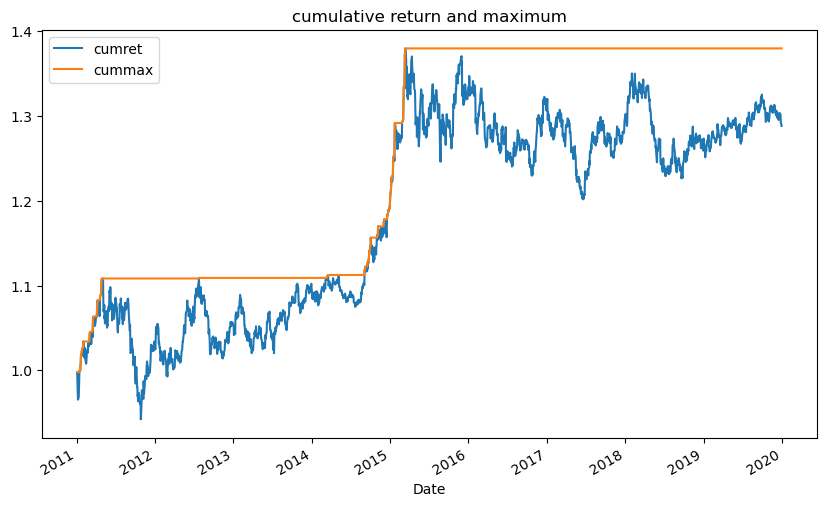

In [48]:
data[['cumret', 'cummax']].dropna().plot(title='cumulative return and maximum', figsize=(10, 6));

### Maximum drawdown

In [49]:
drawdown = data['cummax'] - data['cumret']
drawdown.max()

0.17779367070195895

<AxesSubplot:xlabel='Date'>

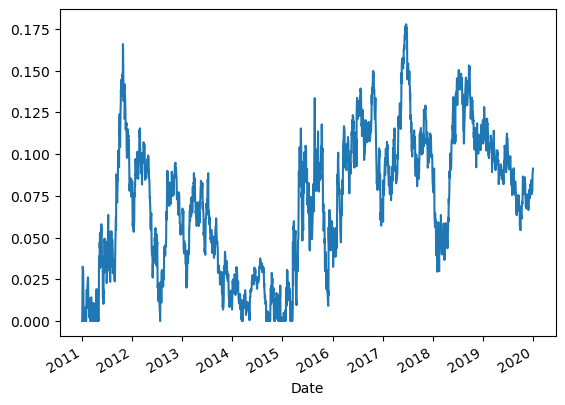

In [51]:
drawdown.plot()

### Longest drawdown period (time under water)

#### Periods between dates at which a new maximum is set 

In [52]:
dates_for_max = drawdown[drawdown == 0]
dates_for_max

Date
2011-01-03    0.0
2011-01-13    0.0
2011-01-14    0.0
2011-01-18    0.0
2011-01-19    0.0
             ... 
2015-03-05    0.0
2015-03-06    0.0
2015-03-10    0.0
2015-03-11    0.0
2015-03-13    0.0
Length: 76, dtype: float64

In [53]:
period_lengths = (dates_for_max.index[1:].to_pydatetime() -
                 dates_for_max.index[:-1].to_pydatetime())

In [54]:
period_lengths[2:5]

array([datetime.timedelta(days=4), datetime.timedelta(days=1),
       datetime.timedelta(days=1)], dtype=object)

In [55]:
period_lengths.max()

datetime.timedelta(days=596)